In [1]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
#import svgutils.compose as sc
from IPython.display import SVG # /!\ note the 'SVG' function also in svgutils.compose
import numpy as np

In [2]:
# Label of the atom 
rest_label="R$_1$"



vals = [[80, 10.,10,10,10,10,10 ], # size of the wedges, the first wedge is transparent and will not be shown 
        [ 0,1,99,75,40,50,60], # colormap values for the inner circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [0,1,21,40,99,50,60], # colormap values for the outer circle, maximum value determines intensity, first is for the transparent wedge and should stay 0
        [ "","1",">99","75","40","50","60"], #labels for the inner circle
        ["","1","21","40",">99","50","60"], #labels for the outer circle    
        ["","Et","Ph","tBu","NO$_2$","H","Br"], #groups  
       ]

#Start angle of the PIE CHART, play with it
startangle=100


CMAPINNER="Purples"

CMAPOUTER="Greens"

OUTERLABEL="AbcD % conversion"
INNERLABEL="CtfY % conversion"



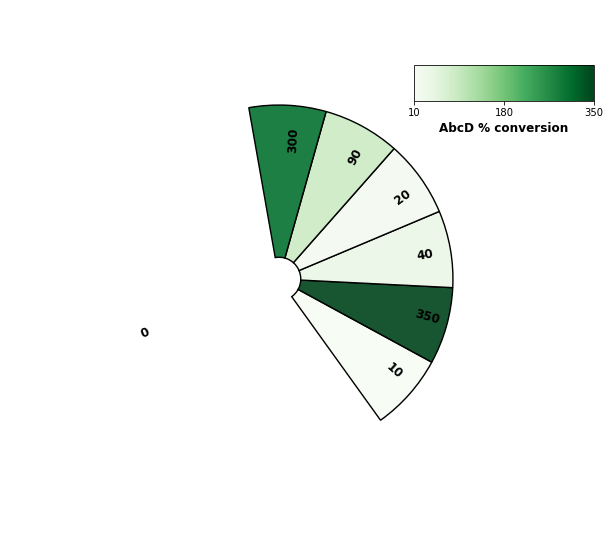

In [53]:
import matplotlib as mpl


# Just look at outer circle
fig, ax = plt.subplots(figsize=(10,10))

size = 0.5
alpha = 0.9
which_wedge = 0

col_values = [0, 100, 150, 200, 240, 260, 500]

col_values = [0, 10, 350, 40, 20, 90, 300]

vmin=min(col_values[1:])
vmax=max(col_values[1:])

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
mapper = ScalarMappable(norm=norm, cmap=CMAPOUTER)


labels = [str(c) for c in col_values]

cmap_outer = plt.get_cmap(CMAPOUTER)
colour = mapper.to_rgba(col_values, alpha=alpha)

outer_circle=ax.pie(vals[0], 
                    radius=0.8,
                    startangle=startangle, 
                    colors=colour, 
                    labels=labels, 
                    rotatelabels=True,
                    labeldistance=0.8,
                    wedgeprops=dict(width=0.7, 
                                    edgecolor='k',linewidth= 1.4),
                    textprops=dict(fontsize='large',weight="semibold",va='center'))

outer_circle[0][which_wedge].set_alpha(0)

ax2cmap2 = plt.axes([0.70, 0.75, 0.25, 0.05])

ticks = [vmin, int((vmin+vmax)/2), vmax]
tick_labels = [str(l) for l in ticks]

cbar1 = plt.colorbar(mapper,cax=ax2cmap2, orientation="horizontal",ticks=ticks, alpha=alpha)
cbar1.ax.set_xticklabels(tick_labels) 

cbar1.set_label(OUTERLABEL,weight='bold',fontsize=12)

In [4]:
print(vals[0])
print(vals[2])
print(vals[4])

[80, 10.0, 10, 10, 10, 10, 10]
[0, 1, 21, 40, 99, 50, 60]
['', '1', '21', '40', '>99', '50', '60']


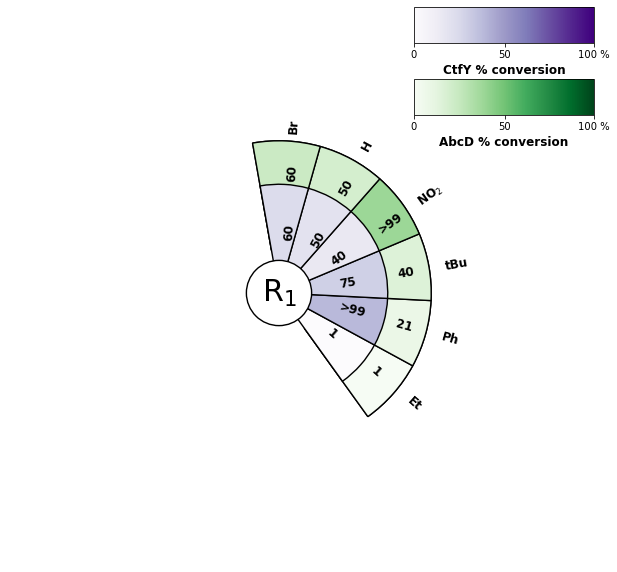

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

ax2cmap1 = plt.axes([0.70, 0.85, 0.25, 0.05])
ax2cmap2 = plt.axes([0.70, 0.75, 0.25, 0.05])
size = 0.5
alpha = 0
which_wedge = 0

circle1 = plt.Circle((0, 0), 0.15, color='w', ls='-', ec='k', lw=1.4)


label = ax.annotate(rest_label, xy=(0, 0), fontsize=30, ha="center", va='center')

cmap_inner = plt.get_cmap(CMAPINNER)
cmap_outer = plt.get_cmap(CMAPOUTER)
inner_colors = cmap_inner(vals[1])
outer_colors = cmap_outer(vals[2])


labels_circle=ax.pie(vals[0], startangle=startangle, radius=0.7, colors=['w']*len(vals[0]), labels=vals[5], rotatelabels=True,labeldistance=1.1,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), textprops=dict(fontsize='large', weight="semibold",va='center') )


outer_circle=ax.pie(vals[0], radius=0.7,startangle=startangle, colors=outer_colors, labels=vals[3], rotatelabels=True,labeldistance=0.4,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4),textprops=dict(fontsize='large',weight="semibold",va='center'))

inner_circle=ax.pie(vals[0], startangle=startangle, radius=1-size, colors=inner_colors, labels=vals[4], rotatelabels=True,labeldistance=1.1,
       wedgeprops=dict(width=size, edgecolor='k',linewidth= 1.4), textprops=dict(fontsize='large', weight="semibold",va='center') )



inner_circle[0][which_wedge].set_alpha(alpha)
outer_circle[0][which_wedge].set_alpha(alpha)
labels_circle[0][which_wedge].set_alpha(alpha)

sm = ScalarMappable(cmap=cmap_inner, norm=plt.Normalize(0,max(vals[1])))
sm.set_array([])
cbar = plt.colorbar(sm,cax=ax2cmap1, orientation="horizontal",ticks=[0,50,99])
cbar.ax.set_xticklabels(['0', '50', '100 %']) 
cbar.set_label(INNERLABEL,weight='bold', fontsize=12)

sm1 = ScalarMappable(cmap=cmap_outer, norm=plt.Normalize(0,max(vals[1])))
sm1.set_array([])
cbar1 = plt.colorbar(sm1,cax=ax2cmap2, orientation="horizontal",ticks=[0,50,99])
cbar1.ax.set_xticklabels(['0', '50', '100 %']) 
cbar1.set_label(OUTERLABEL,weight='bold',fontsize=12)


ax.add_artist(circle1)
ax.set(aspect="equal")
plt.show()

### CHANGE NAME IF YOU NEED A SECOND REST
fig.savefig('R1.svg', transparent=True)

In [6]:
import pandas as pd

        

In [7]:
def wedge_defaults(num_wedges):
    defaults = {
         1:{
    'colours': ["Purples"],
    'radius': [0.5],
    'label_distance': [0.55],
    'legend_labels': None,
    'legend_coord': [[0.8, 0.85]],
    'circle_label': "",
    'slice_label_distance': 1.1,
    },
        2:{
    'colours': ["Purples", "Greens"],
    'radius': [0.5, 0.7],
    'label_distance': [0.55, 0.8],
    'legend_labels': None,
    'legend_coord': [[0.8, 0.85], [0.70, 0.75]],
    'circle_label': "",
    'slice_label_distance': 1.1,
    },
         3:{
    'colours': ["Purples", "Greens", "OrRd" ],
    'radius': [0.5, 0.7, 0.9],
    'label_distance': [0.8, 0.8, 0.85],
    'legend_labels': None,
    'legend_coord': [[1.2, 0.85], [1.2, 0.75], [1.2, 0.65]],
    'circle_label': "",
    'slice_label_distance': 1.1,
    },
        4: {
    'colours': ["Purples", "Greens", "OrRd", "Blues" ],
    'radius': [0.5, 0.7, 0.9, 1.1],
    'label_distance': [0.8, 0.8, 0.85, 0.9],
    'legend_labels': None,
    'legend_coord': [[1.2, 0.85], [1.2, 0.75], [1.2, 0.65], [1.2, 0.55],],
    'circle_label': "",
    'slice_label_distance': 1.05,
    },
        5: {
    'colours': ["Purples", "Greens", "OrRd", "Blues", "RdPu" ],
    'radius': [0.5, 0.7, 0.9, 1.1, 1.3],
    'label_distance': [0.8, 0.8, 0.85, 0.9, 0.9],
    'legend_labels': None,
    'legend_coord': [[1.2, 0.85], [1.2, 0.75], [1.2, 0.65], [1.2, 0.55],[1.2, 0.45],],
    'circle_label': "",
    'slice_label_distance': 1.05,
    },
    }
    try:
        return defaults[num_wedges]
    except KeyError:
        return {
            'colours': None,
            'radius': None,
            'label_distance': None,
            'legend_labels': None,
            'legend_coord': None,
            'circle_label': None,
            'slice_label_distance': None,
        }

In [8]:
def default_legend_tick(values):
    def round_to(x, base=5):
        return base * round(x/base)
    minv = min(values)
    maxv = max(values)
    ticks = [minv, round_to((minv + maxv)/2) ,maxv]

    tick_labels = [str(round_to(l)) for l in ticks]

    return ticks, tick_labels

def default_label_format(c):
    return str(c)



def pie_wedges(df, slice_values, slice_labels, colours=None,
        radius=None,
        label_distance=None,
        legend_labels=None,
        legend_coord=None,
        circle_label=None,
        slice_label_distance=None, 
        startangle=100, 
        wedge_percent=0.43,
        figsize=(10,10),
        wedgeprops_width= 0.5,
        edgecolour='k',
        linewidth=1.4,
        textprops_fontsize='large',
        textprops_fontweight='semibold',
        textprops_va= 'center',
        textprops_ha='left',
        blankcolour='w',
        ls='-',
        circle_fontsize= 30,
        circle_ha='center',
        circle_va='center',
        circle_radius=0.15, 
        legend_orientation= 'horizontal',
        legend_fontweight= 'bold',
        legend_fontsize= 12,
        legend_units='',
        legend_boxheight= 0.05,
        legend_boxwidth= 0.25,
        legend_tickvalues= default_legend_tick,
        label_format= default_label_format,
        hide_wedge_label= False,
        hide_slice_label= False):
    """
    Help on functions
    """
    # Gather all wedges parameters together and update
    # the defaults
    wedge_params = {
    'colours': colours,
    'radius': radius,
    'label_distance': label_distance,
    'legend_labels': legend_labels,
    'legend_coord':legend_coord,
    'circle_label': circle_label,
    'slice_label_distance':slice_label_distance,
    }
    wedge_params = {k:v for k,v in wedge_params.items() if v is not None}
    
    wedges = wedge_defaults(len(slice_values))
    wedges.update(wedge_params)
    
    # Replace any None values with the column name of slice_values
    if wedges['legend_labels'] is None:
        wedges['legend_labels'] = slice_values
    
    #     plt_config = {

    #     }
    #     if config is not None:
    #         plt_config.update(config)
    
    
    fig, ax = plt.subplots(figsize=figsize)

    alpha = 0
    wedgeprops=dict(width=wedgeprops_width, 
                    edgecolor=edgecolour,
                    linewidth= linewidth)
    textprops=dict(fontsize=textprops_fontsize, 
                   weight=textprops_fontweight,
                   va=textprops_va, ha=textprops_ha)
    
    num_slices = df.shape[0]
    slice_sizes = [10*((1-wedge_percent)*num_slices)/(wedge_percent)] + [10]*num_slices
    
    # centre circle first
    centre_circle = plt.Circle((0, 0),
                               circle_radius, 
                               color=blankcolour, 
                               ls=ls, 
                               ec=edgecolour, 
                               lw=linewidth)
    centre_label = ax.annotate(wedges['circle_label'], 
                               xy=(0, 0), 
                               fontsize=circle_fontsize, 
                               ha=circle_ha, 
                               va=circle_va)
    ax.add_artist(centre_circle)
    
    
    
    # add the outer labels first
    if not hide_slice_label:
        labels = [''] + df[slice_labels].tolist()
        labels_layer =ax.pie(slice_sizes, 
                             startangle=startangle, 
                             radius=wedges['radius'][-1], 
                             colors=[blankcolour]*len(slice_sizes), 
                             labels=labels, 
                             rotatelabels=True,
                             labeldistance=wedges['slice_label_distance'],
                             wedgeprops=wedgeprops, 
                             textprops=textprops)
        labels_layer[0][0].set_alpha(alpha)
    
    # build from ouside in
    slice_values.reverse()
    for idx, slice in enumerate(slice_values):
        idx = len(slice_values) - idx - 1
        values = [0] + df[slice].tolist()
        # run a custom function to format the labels - first is always
        # empty because the first wedge is the hidden one
        labels = [label_format(c) for c in values]
        labels[0] = ''
        if hide_wedge_label:
            labels = [''] * len(values)
        cmap_label = wedges['colours'][idx]
        colour_map = plt.get_cmap(cmap_label)
        layer = ax.pie(slice_sizes, 
                       startangle=startangle, 
                       radius=wedges['radius'][idx], 
                       colors=colour_map(values), 
                       labels=labels, 
                       rotatelabels=True,
                       labeldistance=wedges['label_distance'][idx],
                       wedgeprops=wedgeprops, 
                       textprops=textprops)
        layer[0][0].set_alpha(alpha)
        
        if wedges['legend_coord'][idx] is not None:
            axcmap = plt.axes(wedges['legend_coord'][idx] + [legend_boxwidth,legend_boxheight])
            sm = ScalarMappable(cmap=colour_map, norm=plt.Normalize(0,max(values)))
            sm.set_array([])
            ticks, tick_labels = legend_tickvalues(values)
            tick_labels[-1] = '{} {}'.format(tick_labels[-1], legend_units) 
            cbar = plt.colorbar(sm,cax=axcmap, 
                            orientation=legend_orientation,
                            ticks=ticks)
          
            cbar.ax.set_xticklabels(tick_labels) 
            cbar.set_label(wedges['legend_labels'][idx],
                           weight=legend_fontweight, 
                           fontsize=legend_fontsize)

    ax.set(aspect="equal")
    
    
    return fig, ax


(<Figure size 720x720 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd3092615f8>)

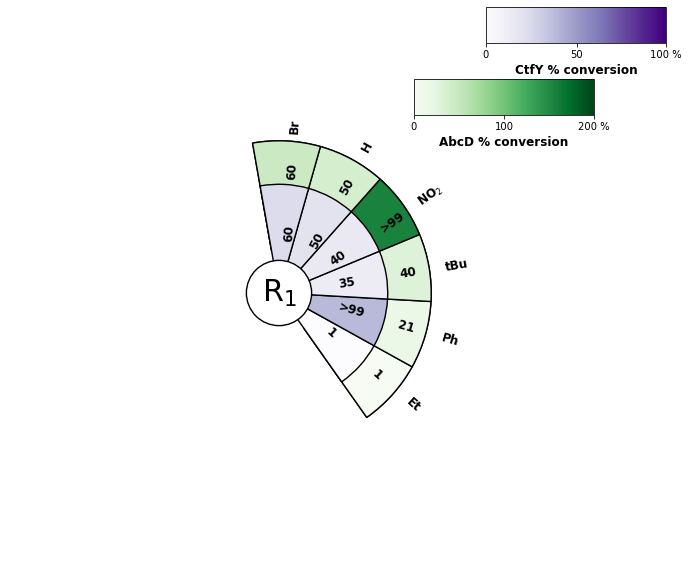

In [9]:


df = pd.DataFrame({
    'AbcD % conversion': [1,99,35,40,50,60],
    'CtfY % conversion': [1,21,40,200,50,60],
    'label': ["Et","Ph","tBu","NO$_2$","H","Br"]
})
wedges = {
    'colours': ["Purples", "Greens"],
    'radius': [0.5, 0.7],
    'label_distance': [0.55, 0.8],
    'legend_labels': ["AbcD % conversion", "CtfY % conversion"],
    'legend_coord': [[0.70, 0.85], [0.70, 0.75]],
    'circle_label': "R$_1$",
    'slice_label_distance': 1.1,
}

def lab_format(c):
    if c==0:
        return ''
    if c>=99:
        return '>99'
    return str(c)

pie_wedges(df, ["AbcD % conversion", "CtfY % conversion"], 'label',  
           circle_label="R$_1$",legend_units='%', label_format=lab_format)



In [10]:
help(pie_wedges)

Help on function pie_wedges in module __main__:

pie_wedges(df, slice_values, slice_labels, colours=None, radius=None, label_distance=None, legend_labels=None, legend_coord=None, circle_label=None, slice_label_distance=None, startangle=100, wedge_percent=0.43, figsize=(10, 10), wedgeprops_width=0.5, edgecolour='k', linewidth=1.4, textprops_fontsize='large', textprops_fontweight='semibold', textprops_va='center', textprops_ha='left', blankcolour='w', ls='-', circle_fontsize=30, circle_ha='center', circle_va='center', circle_radius=0.15, legend_orientation='horizontal', legend_fontweight='bold', legend_fontsize=12, legend_units='', legend_boxheight=0.05, legend_boxwidth=0.25, legend_tickvalues=<function default_legend_tick at 0x7fd30b16cd08>, label_format=<function default_label_format at 0x7fd33079eb70>, hide_wedge_label=False, hide_slice_label=False)
    Help on functions



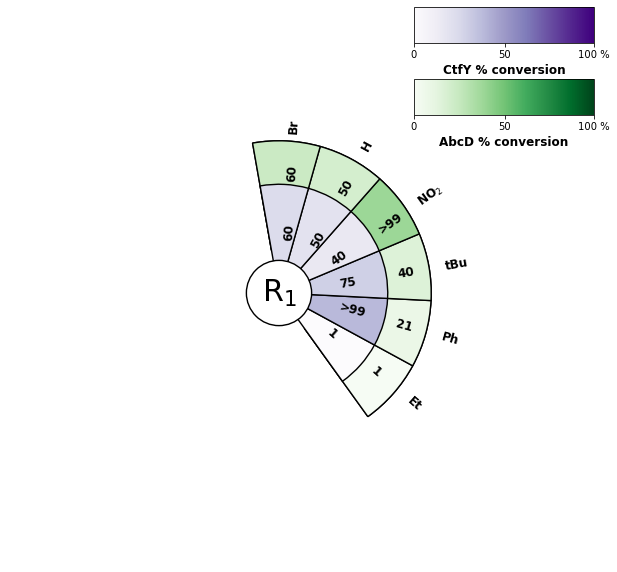

In [11]:
fig

(<Figure size 720x720 with 4 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd30aeac4e0>)

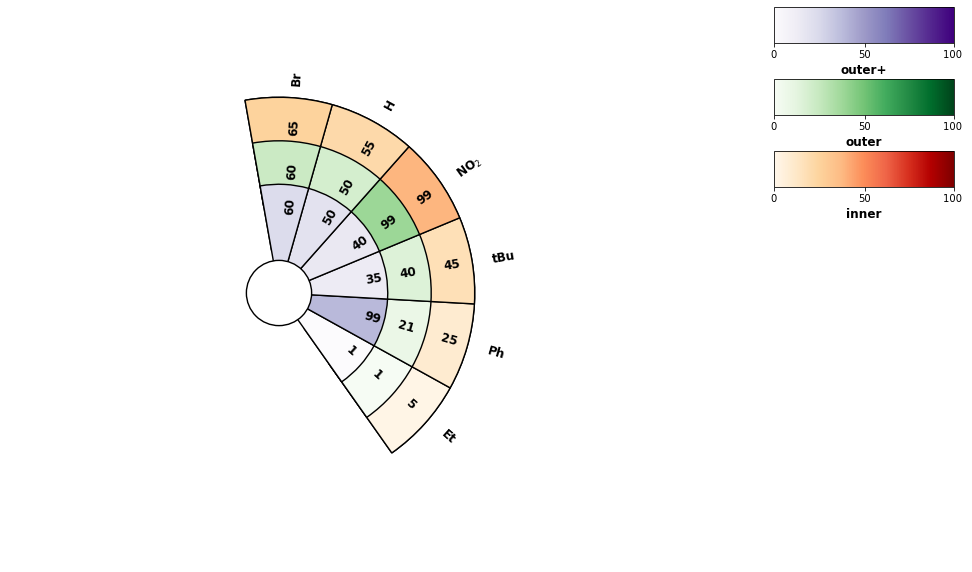

In [12]:
df = pd.DataFrame({
    'inner': [1,99,35,40,50,60],
    'outer': [1,21,40,99,50,60],
    'outer+': [5,25,45,99,55,65],
    
    'label': ["Et","Ph","tBu","NO$_2$","H","Br"]
})



pie_wedges(df, ['inner', 'outer', 'outer+'], 'label',  startangle=100, wedge_percent=0.43)



(<Figure size 720x720 with 6 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd308fa30f0>)

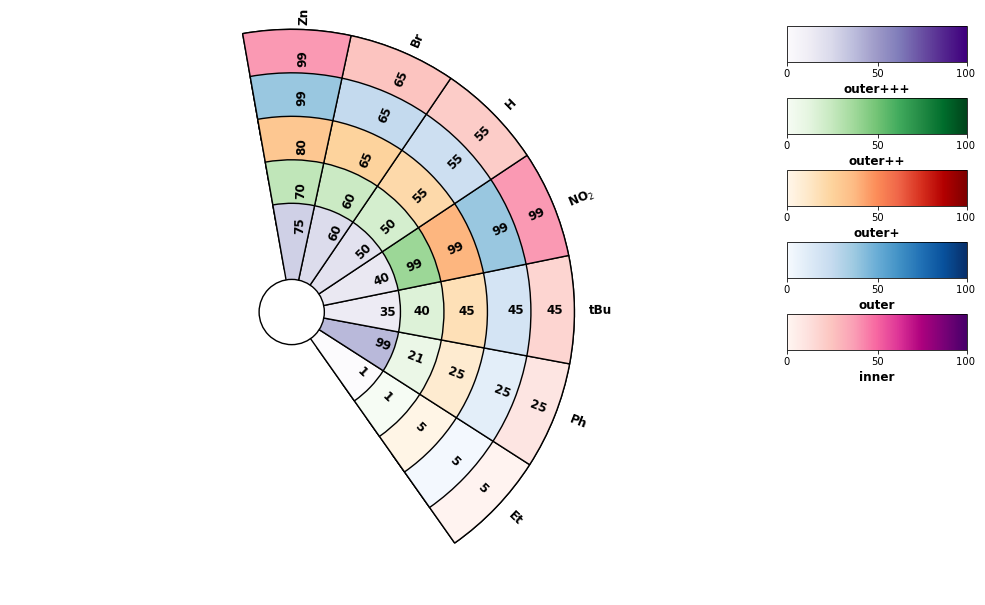

In [13]:
df = pd.DataFrame({
    'inner': [1,99,35,40,50,60, 75],
    'outer': [1,21,40,99,50,60, 70],
    'outer+': [5,25,45,99,55,65, 80],
    'outer++': [5,25,45,99,55,65, 99],
    'outer+++': [5,25,45,99,55,65, 99],
    'label': ["Et","Ph","tBu","NO$_2$","H","Br", 'Zn']
})



pie_wedges(df, ['inner', 'outer', 'outer+', 'outer++', 'outer+++'], 'label' )

(<Figure size 720x720 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd308347080>)

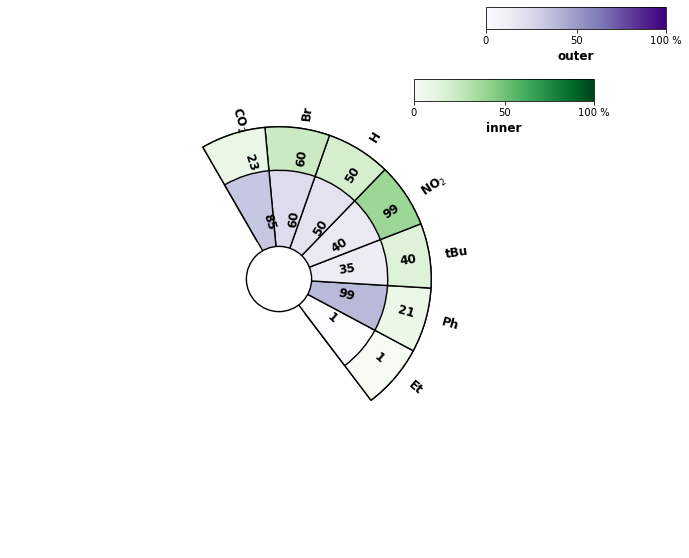

In [14]:
df = pd.DataFrame({
    'inner': [1,99,35,40,50,60, 85],
    'outer': [1,21,40,99,50,60, 23],
    'label': ["Et","Ph","tBu","NO$_2$","H","Br", "CO$_2$"]
})



pie_wedges(df, ['inner', 'outer'], 'label',  startangle=120, wedge_percent=0.48,
          legend_fontsize=12, legend_units='%', legend_boxheight=0.03)

(<Figure size 720x720 with 6 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd302f88518>)

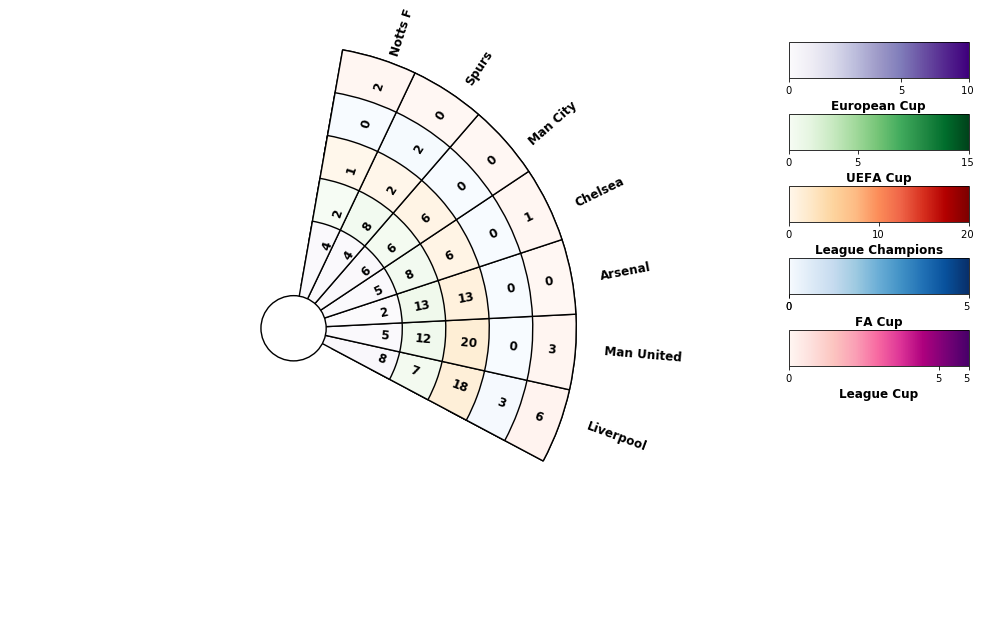

In [15]:
df = pd.DataFrame({
    'League Cup': [8,5,2,5,6,4,4],
    'FA Cup': [7,12,13,8,6,8,2],
    'League Champions':[18,20,13,6,6,2,1],
    'UEFA Cup': [3,0,0,0,0,2,0],
    'European Cup':[6,3,0,1,0,0,2],
    'team': ["Liverpool","Man United","Arsenal","Chelsea","Man City","Spurs", "Notts F"]
})



pie_wedges(df, ['League Cup', 'FA Cup', 'League Champions', 'UEFA Cup', 'European Cup' ], 
           'team',  startangle=80, wedge_percent=0.30, 
          slice_label_distance= 1.1)